<a href="https://colab.research.google.com/github/zakiahintan/Kelas_Dasar/blob/main/Mini_Project_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Data Biaya Pengeluaran Medis Personal

### Latar Belakang Dataset

Biaya pengeluaran medis adalah biaya yang dikeluarkan oleh seseorang untuk mendapatkan layanan kesehatan. Umumnya, biaya ini dikeluarkan tidak secara rutin, hanya pada saat-saat tertentu saja, misalkan saat orang yang bersangkutan sakit dan perlu berobat. Besaran biaya yang dikeluarkan pun bervariasi bergantung pada beberapa faktor, diantaranya usia, gender, riwayat penyakit, dan banyak lagi.

Dataset terkait besaran biaya pengeluaran medis yang akan saya pakai diunduh dari *kaggle.com* yang sumber referensi utamanya adalah buku *Machine Learning with R* karya Brett Lantz.

### Pertanyaan Analisis

1.   Apakah seorang perokok memiliki biaya pengeluaran medis yang lebih tinggi dibandingkan yang bukan perokok?

### EDA (Exploratory Data Analysis)

In [33]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/insurance.csv')
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Variabel pada dataset: 
*   age      : usia
*   sex      : jenis kelamin 
*   bmi      : body mass index, perbandingan antara tinggi dan berat badan
*   children : jumlah anak dalam tanggungan
*   smoker   : perokok (ya/tidak)
*   region   : wilayah tinggal pengguna (US,Northeast, Southeast, Southwest, or Northwest)
*   charges  : biaya yang dikeluarkan untuk mendapatkan pelayanan kesehatan

Dimensi Data

In [34]:
df.shape

(1338, 7)

In [35]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Variabel pada Dataset

In [36]:
df.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Mengecek Missing Data

In [38]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

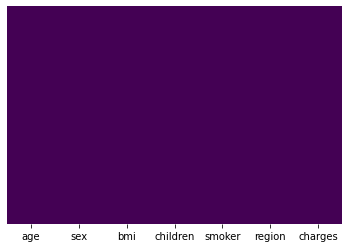

In [39]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
# tidak ada kolom data yang kosong

Mengecek Outlier

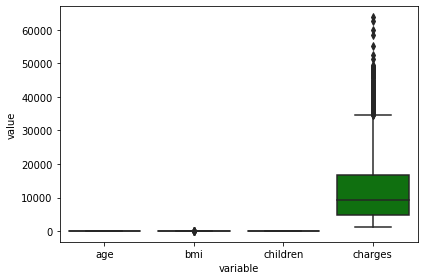

In [40]:
df1=df.select_dtypes(include=['float64', 'int64']) #Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()


Melihat Korelasi Data

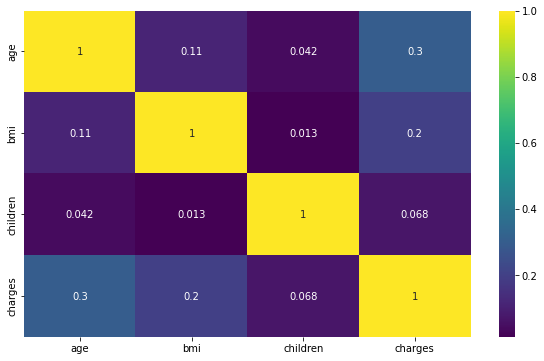

In [41]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Melihat Statistik Data

In [42]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

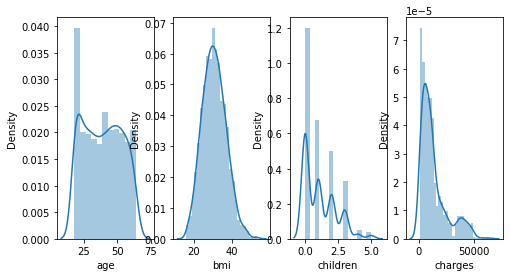

In [43]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Pairplot

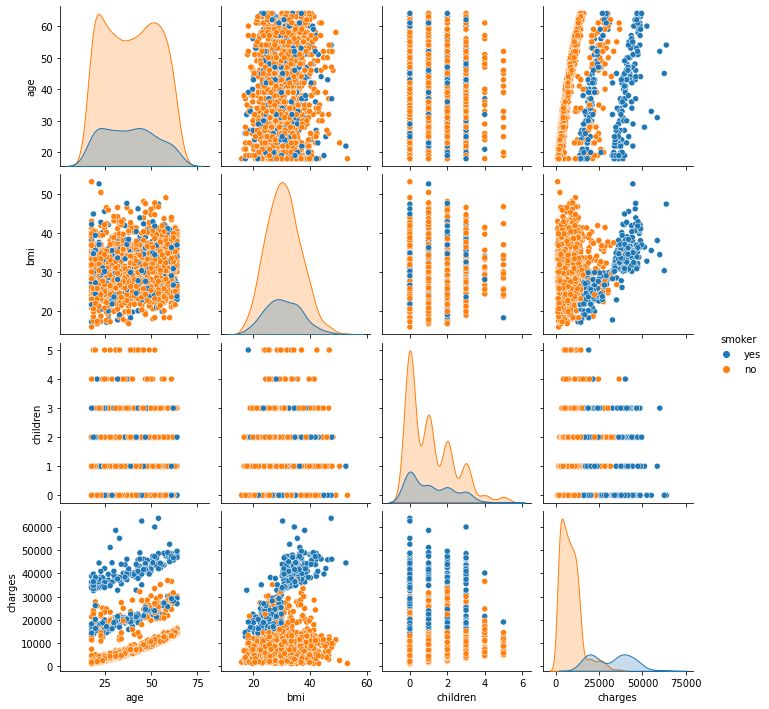

In [44]:
g = sns.pairplot(df, hue="smoker")

### Data Preparation

In [45]:
df =df.drop(columns=['bmi', 'children', 'region'])
df.head()

,age,sex,smoker,charges
0,19,female,yes,16884.92400
1,18,male,no,1725.55230
2,28,male,no,4449.46200
3,33,male,no,21984.47061
4,32,male,no,3866.85520


Melakukan Pengkodean (Encoding)

In [47]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [48]:
df['age'].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [49]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [50]:
#Encoding dengan data sedikit
cleanup_nums = {"sex":     {"male": 1, "female": 2},
                "smoker": {"yes": 1, "no": 0}}
df = df.replace(cleanup_nums)
df.head()

,age,sex,smoker,charges
0,19,2,1,16884.92400
1,18,1,0,1725.55230
2,28,1,0,4449.46200
3,33,1,0,21984.47061
4,32,1,0,3866.85520


Menghapus Outlier

In [68]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age         24.0
sex          1.0
smoker       0.0
charges    668.5
dtype: float64


In [69]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,age,sex,smoker,charges
1,18,1,0,57
2,28,1,0,306
3,33,1,0,1097
4,32,1,0,254
5,31,2,0,247
...,...,...,...,...
1332,52,2,0,802
1333,50,1,0,746
1334,18,2,0,118
1335,18,2,0,32


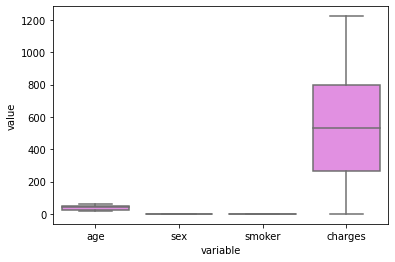

In [70]:
#Melihat Outlier
sns.boxplot(x="variable", y="value", color='violet',orient='v', data=pd.melt(df_clear))

plt.show()

Normalisasi Data

In [71]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,age,sex,smoker,charges
0,0.000000,0.0,0.0,0.046645
1,0.217391,0.0,0.0,0.250409
2,0.326087,0.0,0.0,0.897709
3,0.304348,0.0,0.0,0.207856
4,0.282609,1.0,0.0,0.202128
...,...,...,...,...
1059,0.739130,1.0,0.0,0.656301
1060,0.695652,0.0,0.0,0.610475
1061,0.000000,1.0,0.0,0.096563
1062,0.000000,1.0,0.0,0.026187


Memilih Variabel Target dan Variabel Independent

In [72]:
y=df_norm['smoker']
X=df_norm.drop(columns=['smoker'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[0. 0. 0. ... 0. 0. 0.]
[[0.         0.         0.04664484]
 [0.2173913  0.         0.25040917]
 [0.32608696 0.         0.89770867]
 ...
 [0.         1.         0.09656301]
 [0.         1.         0.02618658]
 [0.06521739 1.         0.07446809]]


Membagi menjadi Data Training dan Data Testing

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

### Data Visualization

In [75]:
#Import Modul PlotLy Express
import plotly.express as px

Scater Plot

In [78]:
#Menyiapkan Data
df = pd.read_csv('/insurance.csv')
cleanup_nums = {"sex":     {"male": 1, "female": 2},
                "smoker": {"yes": 1, "no": 0}}
df = df.replace(cleanup_nums)
df['charges'] = df['charges'].astype('string')
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.924
1,18,1,33.770,1,0,southeast,1725.5523
2,28,1,33.000,3,0,southeast,4449.462
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.5483
1334,18,2,31.920,0,0,northeast,2205.9808
1335,18,2,36.850,0,0,southeast,1629.8335
1336,21,2,25.800,0,0,southwest,2007.945


In [81]:
#Membuat Plot Scatter
fig = px.scatter(df,
                 x = "age",
                 y = "charges",
                 color = "smoker",
                 size = "sex")

fig.update_layout(
    title = 'Iris Dataset',
    title_font_color = 'purple',
    title_font_size = 30,

    xaxis = dict(
        title = 'age',
        titlefont_size = 16,
        tickfont_size = 14),
    yaxis = dict(
        title = 'charges',
        titlefont_size = 16,
        tickfont_size = 14))

fig.show()


### Hasil Akhir
Biaya pengeluaran medis seorang perokok lebih tinggi dibandingkan yang bukan perokok.